# Run the whole deltas algorithm

In [10]:
%load_ext autoreload
%autoreload 2

import ipywidgets
import deltas.pipeline.run as run
from deltas.model import base, downsample
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [11]:
N1 = 10000
N2 = 10
# Gaussian (not always seperable)
data_clf = run.get_data(
    m1=[-5, -5],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

clf


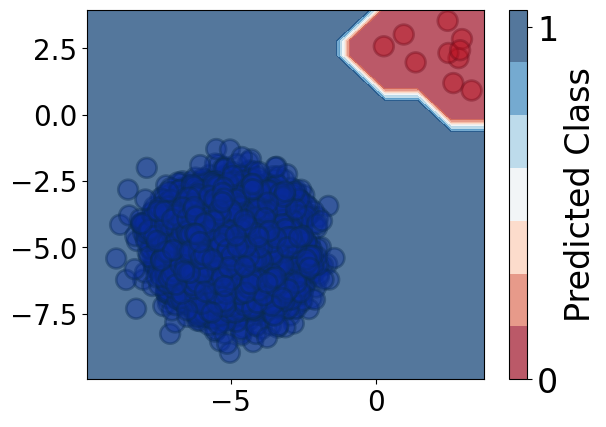

SMOTE


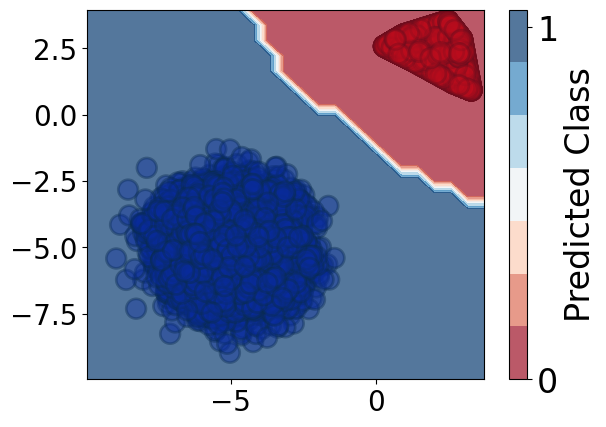

In [12]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

deltas init: [0.999999999999999, 0.37581920038767236]
eq. 7 can be satisfied: True
constraint init: True
Singular matrix C in LSQ subproblem
    delta1 : 0.999999999999999 
    delta2: 0.37581920038767236
    constraint satisfied: True


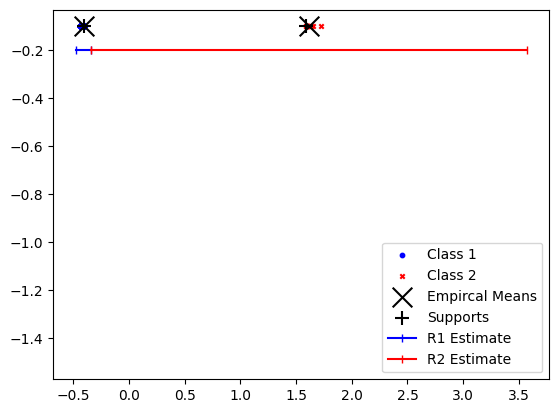

In [13]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
deltas_model = base.base_deltas(
    clf).fit(X, y, grid_search=False, _print=True, _plot=True)

## Plot training data information

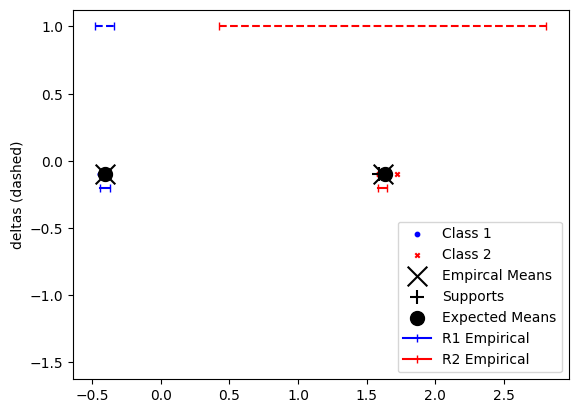

In [14]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [15]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [16]:
deltas_model.print_params()

Parameters
                R:  1.7213896025580198
                N1: 10000
                N2: 10
                R1: 0.0346796995047684
                R2: 0.1049955720961755
                M:  1.9991478879685034
                D:  2.0243708863920964
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.96715
deltas accuracy: 0.99975
SMOTE accuracy: 0.99995

original F1: 0.9660342242671768
deltas F1: 0.9997500624843789
SMOTE F1: 0.999949997499875

original precision0: 0.938350380031904
deltas precision0: 1.0
SMOTE precision0: 0.9999000099990001

original precision1: 1.0
deltas precision1: 0.9995002498750625
SMOTE precision1: 1.0

original


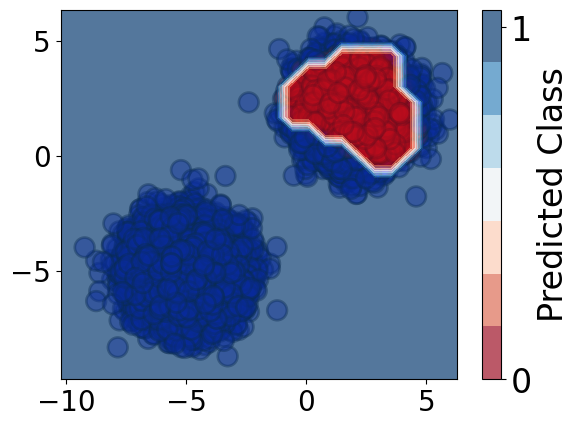

deltas


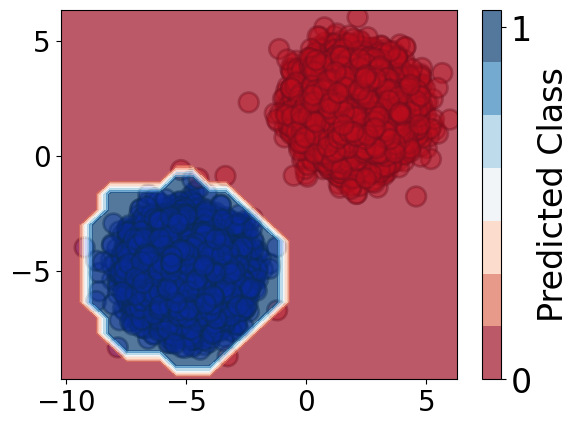

SMOTE


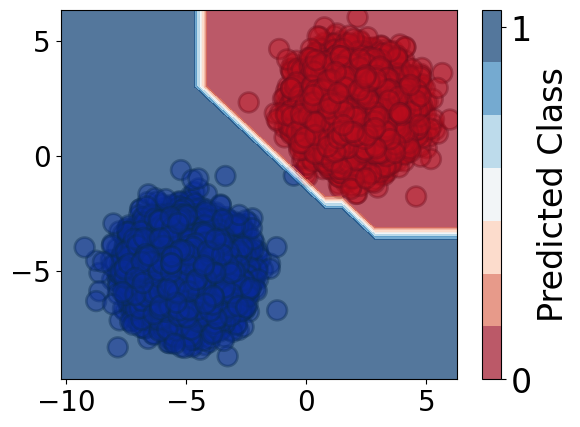

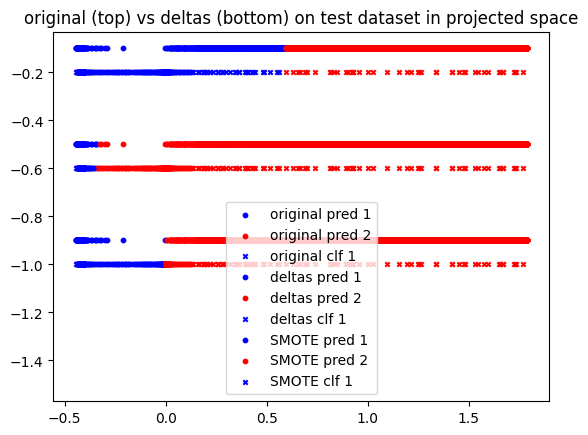

In [17]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)